# ZADANIE 1

a) Wykonaj poniższy skrypt i przeanalizuj go:

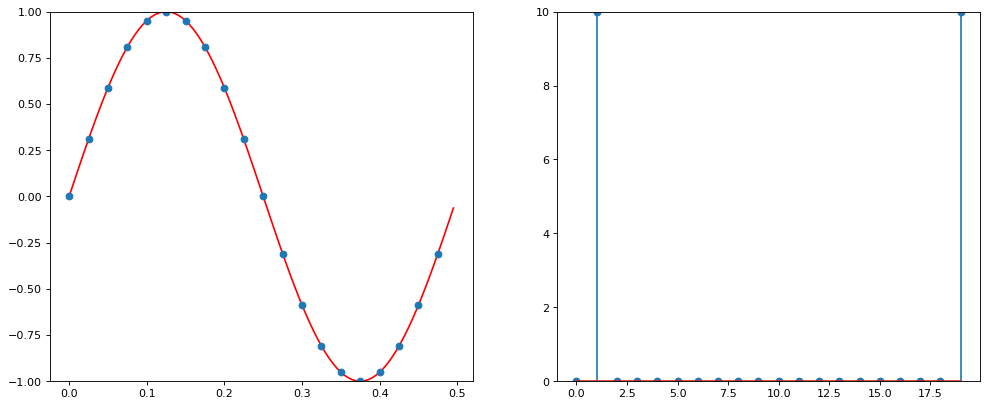

In [162]:
from __future__ import division
from pylab import *
from numpy import *
from numpy import *
from scipy import *
from ipywidgets import *
import math as mt
from matplotlib.ticker import AutoMinorLocator

%matplotlib inline

# (kod został opakowany w funkcję, aby środowisko nie podpowiadało zmiennych)
def foo():
    A = 1
    # amplituda sygnału

    LP = 1
    # liczba analizowanych pełnych przebiegów sygnału (okresów)

    w = 40           
    # częstotliwość próbkowania [Hz] sygnału 
    # (jak często w ciągu sekundy pobieramy informacje o wartości sygnału)

    f = 2.0           
    # częstotliwość sygnalu [Hz]

    T = 1.0/f        
    # okres sygnalu [s] (jak długo trwa jeden przebieg sinusa)

    TW = 1.0/w        
    # okres probkowania [s] (co ile sekund pobieramy próbkę)

    t = np.arange(0, LP*T, TW)
    # generujemy momenty, w których pobieramy próbki

    n = len(t)
        
    FUNC = lambda t : A*sin(2*pi*t*f)    
    # def. funkcji (tutaj sinus)

    signal = FUNC(t)                 
    # funkcja spróbkowana

    fig = plt.figure(figsize=(15, 6), dpi=80)   
    ax = fig.add_subplot(121)

    ## --- POMOCNICZY SYGNAŁ
    base_t = np.arange(0, LP*T, 1.0/200.0)
    base_signal = FUNC(base_t)
    ax.plot(base_t, base_signal, linestyle='-', color='red')
    ax.set_ylim([min(base_signal), max(base_signal)])
    ## --- 

    ax.plot(t, signal, 'o')

    signal1 = fft.fft(signal)
    # sygnal w dziedzinie czestotliwosci 

    signal1 = abs(signal1)        
    # modul sygnalu

    freqs = range(int(n))

    ax = fig.add_subplot(122)
    ymax = max(signal1)
    if (ymax > 3.0):
        ax.set_ylim([0.0,ymax])
    else:
        ax.set_ylim([0.0,3.0])
    stem(freqs, signal1, '-*')

    show()

foo()

UWAGA: do dalszych ćwiczeń warto powyższy skrypt przekształcić na funkcję o wielu argumentach, typu: amplituda, częstotliwość próbkowania, liczba przebiegów. Oczywiście dla wygody, należy nadać wartości domyślne argumentom funkcji.

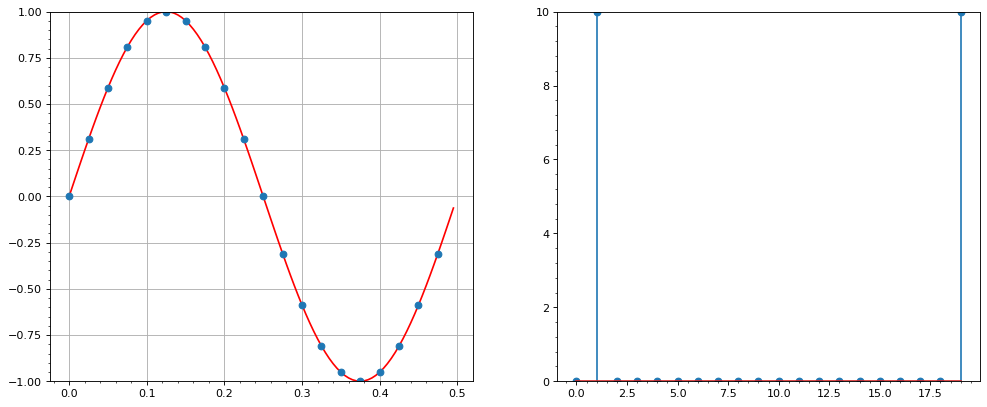

In [ ]:
# zdefiniowana funkcja

# parametry to odpowiednio: a, LP, w, f 
def draw_signal(amplitude=1, interval_num=1, sampling_freq=40, signal_freq=2):
    signal_interval = 1.0 / signal_freq
    sampling_interval = 1.0 / sampling_freq

    # momenty pobrania próbek - t
    t = np.arange(0, interval_num * signal_interval, sampling_interval)
    n = len(t)
           
    # funkcja sygnału - sin
    FUNC = lambda x : amplitude * sin( 2*pi * x * signal_freq ) 
    # przebieg sygnału
    signal = FUNC(t)

    # pomocniczy sygnał (momenty pobierania próbek oraz przebieg)
    base_t = np.arange(0, interval_num * signal_interval, 1.0 / 200.0) 
    base_signal = FUNC(base_t)

    # przygotowanie figury 
    fig = plt.figure(figsize=(15, 6), dpi=80)
    # narysowanie pierwszego wykresu
    ax = fig.add_subplot(121)
    ax.plot(base_t, base_signal, linestyle='-', color='red')
    ax.plot(t, signal, 'o')
    # ax.set_ylim([min(base_signal), max(base_signal)])
    ax.set_ylim([-amplitude, amplitude])
    ax.xaxis.set_minor_locator(AutoMinorLocator(5))
    ax.yaxis.set_minor_locator(AutoMinorLocator(5))
    ax.grid()

    # moduł sygnału w dziedzinie czestotliwosci 
    freq_domain_signal = abs(fft.fft(signal))
    # zakres częstotliwości w oparciu o częstotliwość próbkowania
    freqs = range(n)

    # narysowanie drugiego wykresu
    ax = fig.add_subplot(122)
    ax.set_ylim([0.0, max([3.0, max(freq_domain_signal)])])
    ax.xaxis.set_minor_locator(AutoMinorLocator(5))
    ax.yaxis.set_minor_locator(AutoMinorLocator(5))
    stem(freqs, freq_domain_signal, '-*')

    show()

draw_signal()

UWAGA DLA CHĘTNYCH: można wykorzystać 'interact', dzięki któremu można zmieniać parametry danej funkcji i na bierząco obserwować zmiany. Poniższy kod przedstawia sposób wykorzystania interact:

In [ ]:
# nasza wersja zamienia import 'ipykernel.pylab.backend_inline' na 'matplotlib_inline.backend_inline'
# wykorzystywana funkcja się nie zmienia ('flush_figures')
from matplotlib_inline.backend_inline import flush_figures

interact(draw_signal, amplitude=(0.1, 5, 0.1), 
         interval_num=(1, 10, 1),
         sampling_freq=(10, 200, 10),
         signal_freq=(0.1, 10, 0.1))

b) Zmień częstotliwość próbkowania na 50Hz.

In [171]:
# w=50

# draw_signal(sampling_freq=50)
interact(draw_signal, amplitude=(0.1, 5, 0.1), 
         interval_num=(1, 10, 1),
         sampling_freq=fixed(50),
         signal_freq=(0.1, 10, 0.1))

interactive(children=(FloatSlider(value=1.0, description='amplitude', max=5.0, min=0.1), IntSlider(value=1, de…

<function __main__.draw_signal(amplitude=1, interval_num=1, sampling_freq=40, signal_freq=2)>

c) Punkty na osi OX spektrum są teraz kolejnymi liczbami naturalnymi, a nie częstotliwościami w Hz. Popraw skrypt (funkcje), tak aby oś OX spektrum była w Hz (podpowiedź: oś OX rozpoczyna się od 0Hz, a kończy się na (prawie!) Hz, gdzie jest częstotliwością próbkowania). Następnie: Upewnij się, że spektrum dla 1Hz-owego sinusa i pięciu (LP=5) analizowanych przebiegów wygląda teraz prawidłowo.

In [ ]:
# popraw oś OX

def draw_signal(amplitude=1, interval_num=1, sampling_freq=40, signal_freq=2):
    signal_interval = 1.0 / signal_freq
    sampling_interval = 1.0 / sampling_freq

    # momenty pobrania próbek - t
    t = np.arange(0, interval_num * signal_interval, sampling_interval)
    n = len(t)
           
    # funkcja sygnału - sin
    FUNC = lambda x : amplitude * sin( 2*pi * x * signal_freq ) 
    # przebieg sygnału
    signal = FUNC(t)

    # pomocniczy sygnał (momenty pobierania próbek oraz przebieg)
    base_t = np.arange(0, interval_num * signal_interval, 1.0 / 200.0) 
    base_signal = FUNC(base_t)
    
    # przygotowanie figury 
    fig = plt.figure(figsize=(15, 6), dpi=80)
    # narysowanie pierwszego wykresu
    ax = fig.add_subplot(121)
    ax.plot(base_t, base_signal, linestyle='-', color='red')
    ax.plot(t, signal, 'o')
    # ax.set_ylim([min(base_signal), max(base_signal)])
    ax.set_ylim([-amplitude, amplitude])
    ax.xaxis.set_minor_locator(AutoMinorLocator(5))
    ax.yaxis.set_minor_locator(AutoMinorLocator(5))
    ax.grid()

    # moduł sygnału w dziedzinie częstotliwosci 
    freq_domain_signal = abs(fft.fft(signal))
    # zakres częstotliwości w oparciu o częstotliwość próbkowania
    freqs = linspace(0, sampling_freq, n, False) # NOTE UPDATED LINE

    # narysowanie drugiego wykresu
    ax = fig.add_subplot(122)
    ax.set_ylim([0.0, max([3.0, max(freq_domain_signal)])])
    ax.xaxis.set_minor_locator(AutoMinorLocator(5))
    ax.yaxis.set_minor_locator(AutoMinorLocator(5))
    stem(freqs, freq_domain_signal, '-*')

    show()

# draw_signal(interval_num=5, signal_freq=1)
interact(draw_signal, amplitude=(0.1, 5, 0.1), 
         interval_num=fixed(5),
         sampling_freq=(10, 200, 10),
         signal_freq=fixed(1))

interactive(children=(FloatSlider(value=1.0, description='amplitude', max=5.0, min=0.1), IntSlider(value=40, d…

<function __main__.draw_signal(amplitude=1, interval_num=1, sampling_freq=40, signal_freq=2)>

d) Podpisz osie obu wykresów, używając funkcji xlabel() i ylabel(). Pamiętaj o jednostkach.

In [ ]:
# podpisz osie wykresów

def draw_signal(amplitude=1, interval_num=1, sampling_freq=40, signal_freq=2):
    signal_interval = 1.0 / signal_freq
    sampling_interval = 1.0 / sampling_freq

    # momenty pobrania próbek - t
    t = np.arange(0, interval_num * signal_interval, sampling_interval)
    n = len(t)
           
    # funkcja sygnału - sin
    FUNC = lambda x : amplitude * sin( 2*pi * x * signal_freq ) 
    # przebieg sygnału
    signal = FUNC(t)

    # pomocniczy sygnał (momenty pobierania próbek oraz przebieg)
    base_t = np.arange(0, interval_num * signal_interval, 1.0 / 200.0) 
    base_signal = FUNC(base_t)
    
    # przygotowanie figury 
    fig = plt.figure(figsize=(15, 6), dpi=80)
    # narysowanie pierwszego wykresu
    ax = fig.add_subplot(121)
    ax.plot(base_t, base_signal, linestyle='-', color='red')
    ax.plot(t, signal, 'o')
    # ax.set_ylim([min(base_signal), max(base_signal)])
    ax.set_ylim([-amplitude, amplitude])
    ax.set_xlabel('Czas [s]')
    ax.set_ylabel('Wartość sygnału')
    ax.xaxis.set_minor_locator(AutoMinorLocator(5))
    ax.yaxis.set_minor_locator(AutoMinorLocator(5))
    ax.grid()

    # moduł sygnału w dziedzinie czestotliwosci 
    freq_domain_signal = abs(fft.fft(signal))
    # zakres częstotliwości w oparciu o częstotliwość próbkowania
    freqs = linspace(0, sampling_freq, n, False) # NOTE UPDATED LINE

    # narysowanie drugiego wykresu
    ax = fig.add_subplot(122)
    ax.set_ylim([0.0, max([3.0, max(freq_domain_signal)])])
    ax.set_xlabel('Częstotliwość [Hz]')
    ax.set_ylabel('Moduł transformaty Fouriera')
    ax.xaxis.set_minor_locator(AutoMinorLocator(5))
    ax.yaxis.set_minor_locator(AutoMinorLocator(5))
    stem(freqs, freq_domain_signal, '-*')

    show()

interact(draw_signal, amplitude=(0.1, 5, 0.1), 
         interval_num=(1, 10, 1),
         sampling_freq=(10, 200, 10),
         signal_freq=(0.1, 10, 0.1))

interactive(children=(FloatSlider(value=1.0, description='amplitude', max=5.0, min=0.1), IntSlider(value=1, de…

<function __main__.draw_signal(amplitude=1, interval_num=1, sampling_freq=40, signal_freq=2)>

f) PorĂłwnaj spektrum funkcji $sin(2*pi*f*t)$, $2*sin(2*pi*f*t)$ i $3*sin(2*pi*f*t)$. Jak zmienia siÄ wartoĹÄ na osi OY na wykresie spektrum?

In [ ]:
# f=1, A=1, LP=1

# NOTE: nie jestem pewien co do nazw na osiach NOTE do poprzedniego podpunktu

In [51]:
# f=1, A=2, LP=1

In [52]:
# f=1, A=3, LP=1

g) Ile punktĂłw jest na wykresach przy czÄstotliwoĹci prĂłbkowania 50Hz, T=1s? ZwiÄksz dwukrotnie liczbÄ prĂłbek poprzez zwiÄkszenie czÄstotliwoĹci prĂłbkowania. NastÄpnie: dla $sin(2*pi*f*t)$ porĂłwnaj wartoĹÄ na osi OY spektrum uzyskane w tym oraz poprzednim punkcie.

In [53]:
# f=1, w=50, LP=1

In [54]:
# f=1, w=100, LP=1

h) Na podstawie wynikĂłw uzyskanych w dwĂłch poprzednich punktach przeskaluj oĹ OY spektrum tak, aby wskazywaĹa wartoĹci amplitud badanych sygnaĹĂłw. SprawdĹş wyniki dla kilku wybranych funkcji.

In [55]:
# popraw oĹ OY

# Zadanie 2

a) Wygeneruj spektrum dla funkcji sinus o czÄstotliwoĹciach 5Hz i 21Hz, dla czestotliwoĹci prĂłbkowania 20Hz i 20 (LP=20) analizowanych przebiegĂłw. Czy rozpoznajesz te funkcje patrzÄc na ich sprĂłbkowane wykresy? Odczytaj w drugim przypadku uzyskanÄ czÄstotliwoĹÄ z FFT. Dlaczego uzyskano taki wynik?

In [56]:
# f=5, w=20, LP=20

In [57]:
# f=21, w=20, LP=20

ZwrĂłÄ uwagÄ, Ĺźe spektrum jest symetryczne (poza pierwszym elementem).

b) Przy w=100Hz, przeanalizuj widma sygnaĹĂłw:

i) $sin(2*pi*t*f)$, $f=10Hz$

In [58]:
# f=10, w=100, A=1, LP=10

ii) $sin(2*pi*t*f)$, $f=20Hz$

In [59]:
# f=20, w=100, A=1, LP=10

iii) $sin(2*pi*t*f)$, $f=30Hz$ (tutaj sĹupki nie bÄdÄ wyglÄdaÄ idealnie; dlaczego?)

In [60]:
# f=30, w=100, A=1, LP=10

iv) $sin(2*pi*t*f)$, $f=40Hz$

In [61]:
# f=40, w=100, A=1, LP=10

c) Przy F=50Hz, w=100Hz, wygeneruj spektrum dla $sin(2*pi*f*t)$. ZwrĂłÄ uwagÄ na skalÄ wykresĂłw.

In [62]:
# f=50, w=100, A=1, LP=10

c) Jak siÄ nazywa twierdzenie, ktĂłrego konsekwencjÄ jest takie zachowanie siÄ spektrum?

# Zadanie 3

PoniĹźsze przypadki skĹÄdajÄ siÄ z zĹoĹźonych sygnaĹĂłw. Trzeba teraz bÄdzie zmodyfikowaÄ trochÄ FUNC

a) $sin(2*pi*t*f) + 2*sin(4*pi*t*f)$, T=1s, w=20Hz.

In [63]:
# Wyrysuj sygnaĹ

d) $0.5 + 2*sin(2*pi*t*f)$, T=1s, w=20Hz. Czy amplituda zerowego prÄĹźka jest prawidĹowa? Dlaczego? (PodpowiedĹş: zwrĂłÄ jeszcze raz uwagÄ na âsymetriÄâ spektrum).

In [64]:
# Wyrysuj sygnaĹ


e) $sin(2*pi*t*f)$ oraz $sin(2*pi*t*f + pi/4)$ dla T=1s, w=20Hz. Czy informacja o fazie zniknÄĹa? Poszukaj ĹladĂłw tej informacji w tablicy, bÄdÄcej wynikiem operacji fft(signal). (funkcja angle(sygnal, deg=True)

In [65]:
# faza = 0


In [66]:
# faza = pi/4


# Zadanie 4

Oblicz wynik ifft(fft(x)), gdzie x=random.random(10). Czy jakaĹ informacja zostaĹa stracona?

In [67]:
# wygeneruj wektor x


In [68]:
# oblicz fft z x


In [69]:
# oblicz ifft

In [70]:
#porownaj x z ifft(fft(x)), wystarczy print